***
## Predictive Modelling of Eating-Out Problem
### Unit Code : 11523                                              
### Unit Name : Data Science Technology and Systems
### Student Id : u3220242
### Student Name : Vishal Mittal
### Submission Dt : 05/10/2022
***

## Prologue

## Part A - Importing and Understanding Data

#### Import the required libraries

In [251]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

#### Load the dataset

In [150]:
# Set dataset file location
dataset_file = "data/zomato_df_final_data.csv"

# Read the dataset file using pandas read_csv method
food_order_dataset = pd.read_csv(dataset_file)

# View the first few rows of the dataset using head() function
food_order_df.head(3)

address   cost  \
0                      371A Pitt Street, CBD, Sydney   50.0   
1      Shop 7A, 2 Huntley Street, Alexandria, Sydney   80.0   
2   Level G, The Darling at the Star, 80 Pyrmont ...  120.0   

                               cuisine        lat  \
0   [Hot Pot, Korean BBQ, BBQ, Korean] -33.876059   
1  [Cafe, Coffee and Tea, Salad, Poké] -33.910999   
2                           [Japanese] -33.867971   

                                                link         lng  \
0    https://www.zomato.com/sydney/sydney-madang-cbd  151.207605   
1  https://www.zomato.com/sydney/the-grounds-of-a...  151.193793   
2        https://www.zomato.com/sydney/sokyo-pyrmont  151.195210   

          phone  rating_number rating_text  \
0  02 8318 0406            4.0   Very Good   
1  02 9699 2225            4.6   Excellent   
2  1800 700 700            4.9   Excellent   

                                 subzone                           title  \
0                                    CBD                   Sydney Madang   
1  The Grounds of Alexandria, Alexandria  The Grounds of Alexandria Cafe   
2                      The Star, Pyrmont                           Sokyo   

                type   votes  groupon    color     cost_2 cuisine_color  \
0  ['Casual Dining']  1311.0    False  #e15307   5.243902       #6f706b   
1           ['Café']  3236.0    False  #9c3203   7.560976       #6f706b   
2    ['Fine Dining']  1227.0    False  #7f2704  10.650407       #6f706b   

                      geometry  
0  POINT (151.20760 -33.87606)  
1  POINT (151.19379 -33.91100)  
2  POINT (151.19521 -33.86797)

#### Check the shape of the dataset

In [148]:
print(food_order_dataset.shape)

(10500, 17)


The above code shows that we have `10,500` records and `17` columns in our dataset. 

#### Check the data types of each column in the dataset

In [149]:
print(food_order_dataset.dtypes)

address           object
cost             float64
cuisine           object
lat              float64
link              object
lng              float64
phone             object
rating_number    float64
rating_text       object
subzone           object
title             object
type              object
votes            float64
groupon             bool
color             object
cost_2           float64
cuisine_color     object
dtype: object


The columns with the data type `float64` are the `numeric columns` and the columns with the data type `object` are the `non-numeric columns.`

#### We will now find the percentage of missing data in each column in our dataset.

In [153]:
for column_name in food_order_dataset.columns:
    pct_missing = np.mean(food_order_df[column_name].isnull())
    print('{} - {}%'.format(column_name, round(pct_missing*100)))

address - 0%
cost - 3%
cuisine - 0%
lat - 2%
link - 0%
lng - 2%
phone - 0%
rating_number - 32%
rating_text - 32%
subzone - 0%
title - 0%
type - 0%
votes - 32%
groupon - 0%
color - 0%
cost_2 - 3%
cuisine_color - 0%


The above list shows the percentage of missing values of each features. Specifically we see that `rating_number`, `rating_text` and `votes` features each have 32% missing, while `cost` and `cost2` has 3% missing and `lng` has only 2% missing.

### Note: We will make a copy of our original dataset and will work on that copy of the dataset.

In [154]:
# Copy the original dataset to variable named `food_order_df`
food_order_df = food_order_dataset.copy()

# view the copied dataset
food_order_df.head(2)

address  cost  \
0                   371A Pitt Street, CBD, Sydney  50.0   
1   Shop 7A, 2 Huntley Street, Alexandria, Sydney  80.0   

                                       cuisine        lat  \
0   ['Hot Pot', 'Korean BBQ', 'BBQ', 'Korean'] -33.876059   
1  ['Cafe', 'Coffee and Tea', 'Salad', 'Poké'] -33.910999   

                                                link         lng  \
0    https://www.zomato.com/sydney/sydney-madang-cbd  151.207605   
1  https://www.zomato.com/sydney/the-grounds-of-a...  151.193793   

          phone  rating_number rating_text  \
0  02 8318 0406            4.0   Very Good   
1  02 9699 2225            4.6   Excellent   

                                 subzone                           title  \
0                                    CBD                   Sydney Madang   
1  The Grounds of Alexandria, Alexandria  The Grounds of Alexandria Cafe   

                type   votes  groupon    color    cost_2 cuisine_color  
0  ['Casual Dining']  1311.0    False  #e15307  5.243902       #6f706b  
1           ['Café']  3236.0    False  #9c3203  7.560976       #6f706b

### 1. Plots/Graphs to support:

#### (a) How many unique cuisines are served by Sydney restraunts?

In [155]:
# we will first convert the cuisine column data from a string to list using apply(eval) method
food_order_df["cuisine"] = food_order_df["cuisine"].apply(eval)

In [156]:
# we will now check if we have the desired result or not.
food_order_df.head(2)

address  cost  \
0                   371A Pitt Street, CBD, Sydney  50.0   
1   Shop 7A, 2 Huntley Street, Alexandria, Sydney  80.0   

                               cuisine        lat  \
0   [Hot Pot, Korean BBQ, BBQ, Korean] -33.876059   
1  [Cafe, Coffee and Tea, Salad, Poké] -33.910999   

                                                link         lng  \
0    https://www.zomato.com/sydney/sydney-madang-cbd  151.207605   
1  https://www.zomato.com/sydney/the-grounds-of-a...  151.193793   

          phone  rating_number rating_text  \
0  02 8318 0406            4.0   Very Good   
1  02 9699 2225            4.6   Excellent   

                                 subzone                           title  \
0                                    CBD                   Sydney Madang   
1  The Grounds of Alexandria, Alexandria  The Grounds of Alexandria Cafe   

                type   votes  groupon    color    cost_2 cuisine_color  
0  ['Casual Dining']  1311.0    False  #e15307  5.243902       #6f706b  
1           ['Café']  3236.0    False  #9c3203  7.560976       #6f706b

##### The above result shows that we acheived the desired result i.e. we converted the string data to a list.

In [157]:
# This function will convert a column to a 1 dimensional array so that we can use typical pandas function on 
# that particular column
def convert_to_1D(series):
    return pd.Series([column for column_list in series for column in column_list])

In [159]:
# Pass the list column for which we have to get the value counts
print(convert_to_1D(food_order_df['cuisine']).value_counts())

Cafe                 3162
Modern Australian     981
Chinese               863
Italian               820
Pizza                 744
                     ... 
Swiss                   1
Dutch                   1
Kiwi                    1
Syrian                  1
Ukrainian               1
Length: 134, dtype: int64


###### The above table shows that count of unique cuisine offered by Sydney restraunts.

In [171]:
start_index = 0 # set start index
end_index = 20 # set end index

# Code for plotting the unique cuisines
fig, ax = plt.subplots(figsize = (14,5))
ax.bar(convert_to_1D(food_order_df["cuisine"]).value_counts().index[start_index:end_index],
       convert_to_1D(food_order_df["cuisine"]).value_counts().values[start_index:end_index],
       color = "mediumseagreen")
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation=90, size=11)
ax.set_ylabel("Count of cuisines", size = 12)
ax.set_xlabel("Name of the cuisines", size = 12)
ax.set_title("Sydney restraunts unique cuisine", size = 14)

Text(0.5, 1.0, 'Sydney restraunts unique cuisine')

The above graph shows the top 20 unique cuisines offered by restraunts in Sydney. `Cafe` cuisine is offered by `3,162` restraunts followed by `Modern Australia` cuisine by `981` restraunts and `Chinese` cuisine by `863` restraunts.

#### (b) Which suburbs (top-3) have the highest number of restraunts?

In [175]:
restraunts_count = food_order_df['subzone'].value_counts(dropna=False).nlargest(3)
print(restraunts_count)

CBD            476
Surry Hills    260
Parramatta     225
Name: subzone, dtype: int64


In [275]:
# Code for plotting the top-3 highest number of restraunts
fig, ax = plt.subplots(figsize = (14,5))
ax.bar(restraunts_count.index, 
       restraunts_count.values,
       color = "mediumseagreen")
plt.xticks(rotation=0, size=11)
for container in ax.containers:
    ax.bar_label(container)
ax.set_ylabel("Number of restraunts", size = 12)
ax.set_xlabel("Name of subrbs ", size = 12)
ax.set_title("Top 3 suburbs with highest number of restraunts", size = 14)

Text(0.5, 1.0, 'Top 3 suburbs with highest number of restraunts')

#### (c) "Restraunts with 'excellent' rating are mostly very expensive while those with 'Poor' rating are rarely expensive".

In [176]:
# To prove the statement, we will first filter the data based on rating. We will only select restraunts with either 
# Excellent rating or Poor rating. We will filter the dataset based on these two ratings and store it in a separate
# dataframe.
filter_df = food_order_df[(food_order_df['rating_text'] == ('Excellent')) | 
                          (food_order_df['rating_text'] == ('Poor'))]

# view the first few rows of the filtered dataframe.
filter_df.head(3)

address   cost  \
1      Shop 7A, 2 Huntley Street, Alexandria, Sydney   80.0   
2   Level G, The Darling at the Star, 80 Pyrmont ...  120.0   
3   Sydney Opera House, Bennelong Point, Circular...  270.0   

                               cuisine        lat  \
1  [Cafe, Coffee and Tea, Salad, Poké] -33.910999   
2                           [Japanese] -33.867971   
3                  [Modern Australian] -33.856784   

                                                link         lng  \
1  https://www.zomato.com/sydney/the-grounds-of-a...  151.193793   
2        https://www.zomato.com/sydney/sokyo-pyrmont  151.195210   
3  https://www.zomato.com/sydney/bennelong-restau...  151.215297   

          phone  rating_number rating_text  \
1  02 9699 2225            4.6   Excellent   
2  1800 700 700            4.9   Excellent   
3  02 9240 8000            4.9   Excellent   

                                 subzone                           title  \
1  The Grounds of Alexandria, Alexandria  The Grounds of Alexandria Cafe   
2                      The Star, Pyrmont                           Sokyo   
3                          Circular Quay            Bennelong Restaurant   

                     type   votes  groupon    color     cost_2 cuisine_color  
1                ['Café']  3236.0    False  #9c3203   7.560976       #6f706b  
2         ['Fine Dining']  1227.0    False  #7f2704  10.650407       #6f706b  
3  ['Fine Dining', 'Bar']   278.0    False  #7f2704  22.235772       #4186f4

In [235]:
# Code for plotting the histogram plots
fig, ax = plt.subplots(figsize = (14,5))
sns.histplot(data = filter_df, x = 'cost', hue = 'rating_text', kde = False)
plt.ylabel("Count of restraunts")
plt.xlabel("Cost in AUD")
plt.show()

According to the graph above, there are very few restraunts with excellent rating wich are expensive. The mjority of the restraunts are in the range of 20 AUD to 120 AUD. We can also see one restraunt with poor rating which is closer to 180 AUD. Hence, the statement `"Restraunts with 'excellent' rating are mostly very expensive while those with 'Poor' rating are rarely expensive"` is not true.

#### 2. Perform Exploratory analysis for the variable of the data. This can be done by producing histograms and distribution plots and descriptive insights about these variables. This can be performed at least for the following variables.
    1. Cost
    2. Rating
    3. Type

In [233]:
sns.displot(food_order_df['cost'], bins=30, kde = True, color = "cornflowerblue")

The distribution plot for `cost` shows that it is right skewed.

In [236]:
sns.displot(food_order_df['rating_text'], bins=30, color = "cornflowerblue")

The distribution plot for `rating_text` shows that there are more restraunts with `Average` rating followed by `Good` rating and `Very Good` rating.

In [260]:
# Box plot for understanding the relationship between 'rating_text' and 'cost' using 'plotly.express' 
fig = px.box(food_order_df, x = "rating_text", y = "cost")
fig.show()

The above box plot shows that the avergae median cost for `Very Good` and `Excellent` rating is 60 AUD. And for `Good` and `Poor` rating, the median cost is 50 AUD.

In [268]:
# For doing the exploratory data analysis for the `type` column, we will first create a copy of the `type` column 
# and store it as a separate data frame 

# copy the type column to a new data frame
type_df = food_order_df[['type']].copy()

In [269]:
# check for null values
type_df.isnull().sum()

type    48
dtype: int64

In [270]:
# since we null values in the dataframe, we will use mode() to replace the missing values
type_df.mode()
type_df.fillna("['Casual Dining']",inplace=True)

In [272]:
# convert the type column from a string to a list
type_df["type"] = type_df["type"].apply(eval)

In [273]:
# get the total number of unique restraunt types in Sydney
len(convert_to_1D(type_df['type']).value_counts())

14

Text(0.5, 1.0, 'Sydney restraunts unique type')

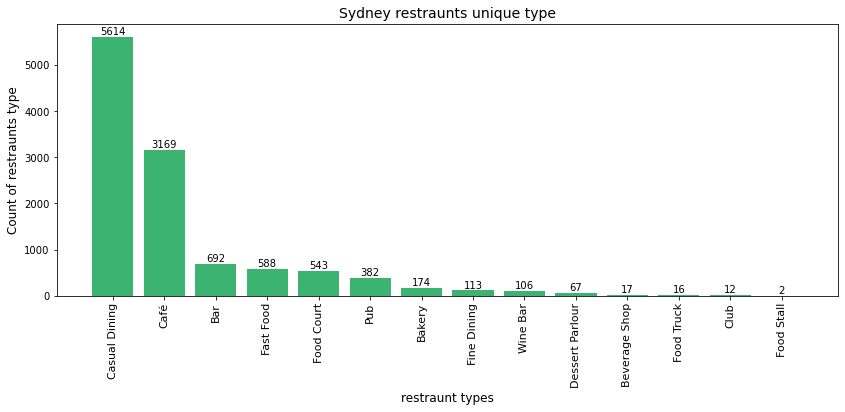

In [277]:
# plotting the bar plot of the unique restraunts type
start_index = 0 # set start index
end_index = 14 # set end index

# Code for plotting the unique cuisines
fig, ax = plt.subplots(figsize = (14,5))
ax.bar(convert_to_1D(type_df['type']).value_counts().index[start_index:end_index],
       convert_to_1D(type_df['type']).value_counts().values[start_index:end_index],
       color = "mediumseagreen")
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation=90, size=11)
ax.set_ylabel("Count of restraunts type", size = 12)
ax.set_xlabel("restraunt types", size = 12)
ax.set_title("Sydney restraunts unique type", size = 14)

##### The majority of restaurants in Sydney are of the `Casual Dining` Type, followed by `Cafe`, `Bar`, `Fast Food`, `Food Court`, and so on.

## 3. Cuisine Density Map

In [278]:
# import the library
import geopandas as gpd

# set the path for reading the sydney geojson file
sydney_GeoJSON_file_path = "data/sydney.geojson"

# read the sydney GeoJSON file
sydney_GeoJSON = gpd.read_file(sydney_GeoJSON_file_path)

In [280]:
# view the first few rows of the data
sydney_GeoJSON.head(3)

SSC_CODE          SSC_NAME CONF_VALUE      SQKM  \
0    10001        Abbotsbury  Very good  4.984673   
1    10002  Abbotsford (NSW)  Very good  1.017855   
2    10010    Acacia Gardens  Very good  0.946630   

                                            geometry  
0  POLYGON ((150.85118 -33.87069, 150.85104 -33.8...  
1  POLYGON ((151.12593 -33.84578, 151.12678 -33.8...  
2  POLYGON ((150.90781 -33.73547, 150.90799 -33.7...

In [281]:
# Upon viewing the data after reading the file, we see that there is a column SSC_NAME which is the name of the 
# Sydney suburbs.
sydney_GeoJSON.rename(columns = {'SSC_NAME':'suburb'}, inplace = True)

# check the GeoDataframe
sydney_GeoJSON.head(3)

SSC_CODE            suburb CONF_VALUE      SQKM  \
0    10001        Abbotsbury  Very good  4.984673   
1    10002  Abbotsford (NSW)  Very good  1.017855   
2    10010    Acacia Gardens  Very good  0.946630   

                                            geometry  
0  POLYGON ((150.85118 -33.87069, 150.85104 -33.8...  
1  POLYGON ((151.12593 -33.84578, 151.12678 -33.8...  
2  POLYGON ((150.90781 -33.73547, 150.90799 -33.7...

In [283]:
# check the shape of the sydney geojson dataframe
sydney_GeoJSON.shape

(494, 5)

<AxesSubplot:>

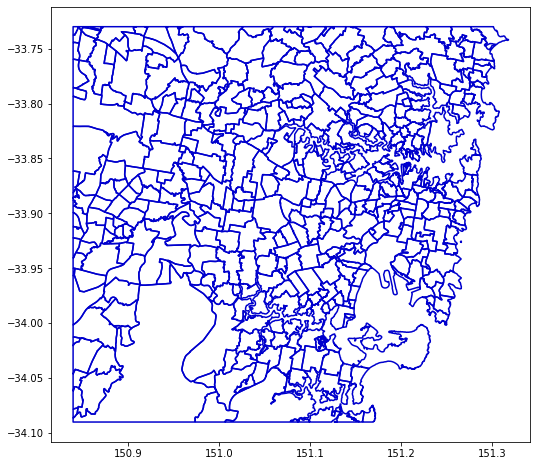

In [304]:
# We will now plot the Sydney GeoJSON dataframe to visualize it.
sydney_GeoJSON.boundary.plot(figsize=(14,8), color="mediumblue")

In [291]:
# we view the Coordinate Reference System of our GeoJSON dataframe.
sydney_GeoJSON.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<AxesSubplot:xlabel='lng', ylabel='lat'>

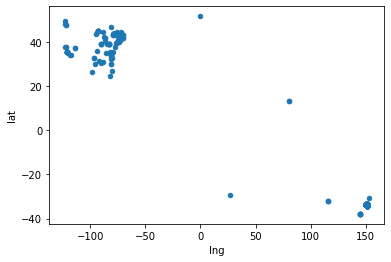

In [294]:
# if we try to plot the latitude and longitude using our dataframe and see the result
food_order_dataset.plot(kind="scatter", x="lng", y="lat")

Upon viewing the above scatter plot it doesn't gives us any meaningful information.

In [295]:
# Since our dataframe is a pandas dataframe, we will have to convert it to a GeoPandas dataframe 

# import the required library
from geopandas import points_from_xy

#food_order_df2 = pd.read_csv("data/zomato_df_final_data.csv")

# convert the food_order_dataset to GeoPandas dataframe
food_order_gdf = gpd.GeoDataFrame(
    food_order_dataset,
    crs = "EPSG:4326",
    geometry = points_from_xy(food_order_df["lng"],food_order_df["lat"]),
)

/opt/anaconda3/lib/python3.9/site-packages/geopandas/array.py:275: ShapelyDeprecationWarning:

The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.



In [100]:
# view the food_order_gdf geopandas dataframe
food_order_gdf.head(3)

address   cost  \
0                      371A Pitt Street, CBD, Sydney   50.0   
1      Shop 7A, 2 Huntley Street, Alexandria, Sydney   80.0   
2   Level G, The Darling at the Star, 80 Pyrmont ...  120.0   

                                       cuisine        lat  \
0   ['Hot Pot', 'Korean BBQ', 'BBQ', 'Korean'] -33.876059   
1  ['Cafe', 'Coffee and Tea', 'Salad', 'Poké'] -33.910999   
2                                 ['Japanese'] -33.867971   

                                                link         lng  \
0    https://www.zomato.com/sydney/sydney-madang-cbd  151.207605   
1  https://www.zomato.com/sydney/the-grounds-of-a...  151.193793   
2        https://www.zomato.com/sydney/sokyo-pyrmont  151.195210   

          phone  rating_number rating_text  \
0  02 8318 0406            4.0   Very Good   
1  02 9699 2225            4.6   Excellent   
2  1800 700 700            4.9   Excellent   

                                 subzone                           title  \
0                                    CBD                   Sydney Madang   
1  The Grounds of Alexandria, Alexandria  The Grounds of Alexandria Cafe   
2                      The Star, Pyrmont                           Sokyo   

                type   votes  groupon    color     cost_2 cuisine_color  \
0  ['Casual Dining']  1311.0    False  #e15307   5.243902       #6f706b   
1           ['Café']  3236.0    False  #9c3203   7.560976       #6f706b   
2    ['Fine Dining']  1227.0    False  #7f2704  10.650407       #6f706b   

                      geometry  
0  POINT (151.20760 -33.87606)  
1  POINT (151.19379 -33.91100)  
2  POINT (151.19521 -33.86797)

In [297]:
# lets view the data in the first row of cuisine column
food_order_gdf['cuisine'][0]

"['Hot Pot', 'Korean BBQ', 'BBQ', 'Korean']"

In [719]:
def show_cuisine_densitymap(cuisine_name):
    # filter the data based on the cuisine name and store it in a separate dataframe.
    cuisine_df = food_order_gdf[food_order_gdf['cuisine'].str.contains(cuisine_name)]
    
    # Now we will join the cuisine dataframe with the Sydney GeoJSON dataframe using spatial join
    cuisine_geojson_df = gpd.sjoin(
        cuisine_df,      # name of the filtered dataframe
        sydney_GeoJSON,  # name of the sydney geojson dataframe
        how = "left",    # left outer join
        op = "within",   
    )
    
    # we will group the data on "SSC_CODE" column store it in a separate dataframe
    cuisine_geojson_grouped_df = cuisine_geojson_df.groupby("SSC_CODE").size()
    
    # we will now reset the index and store it in a separate dataframe
    cuisine_geo_df = cuisine_geojson_grouped_df.to_frame().reset_index()
    
    # we rename the columns so that it is easier to understand
    cuisine_geo_df.columns = ["SSC_CODE", "listings_count"]
    
    # we now merge the sydney geojson dataframe with the 'cuisine_geo_df' dataframe
    # on 'SSC_CODE' column as outer join
    sydney_merged_areas = sydney_GeoJSON.merge(cuisine_geo_df, on = "SSC_CODE", how = "outer")
    
    # now we will plot the merged areas to see the plot
    fig, ax = plt.subplots(figsize = (12,10))
    sydney_GeoJSON.boundary.plot(ax = ax)
    sydney_merged_areas.plot(
        column = "listings_count", 
        cmap="GnBu",
        ax=ax,
        legend=True
    )
    plt.title(str(cuisine_name) + " cuisine density map")
#end of function

In [720]:
# set cuisine name for which you want to see the plot on the map
cuisine_name = "Indian"

# call the function to display the map
show_cuisine_densitymap(cuisine_name)

***

## Part B - Predictive Modelling

In [1007]:
# Before moving forward we will make a copy of the original data frame to perfom the predictive modelling tasks.
food_ordering_df = food_order_dataset.copy()

In [1008]:
# since we null values in the dataframe, we will use mode() to replace the missing values
food_ordering_df['type'].mode()
food_ordering_df['type'].fillna("['Casual Dining']",inplace=True)

In [1009]:
food_ordering_df["type"] = food_ordering_df["type"].apply(eval)

### I. Feature Engineering

#### 1. Perform Data Cleaning

In [1010]:
# we will create a function for checking of the null values so that we can just reuse this function,
# instead of typing the code multiple times.

def getColsWithNan(data):
    # get the Null values from the dataframe that we just created in the above step.
    nullValues = data.isna()

    # this will return true for the columns which have null values
    NullCols = nullValues.any()

    # get the columns with the null values
    ColsWithNull = data.columns[NullCols].tolist()
    print(ColsWithNull)
#end of function

In [1011]:
# call the function that we created above and pass the dataframe/dataset as the parameter in the function.
getColsWithNan(food_ordering_df)

['cost', 'lat', 'lng', 'rating_number', 'rating_text', 'votes', 'cost_2']


In [1012]:

food_ordering_df = food_ordering_df[food_ordering_df['rating_number'].notnull()]
food_ordering_df = food_ordering_df[food_ordering_df['type'].notnull()]

In [1013]:
getColsWithNan(food_ordering_df)

['cost', 'lat', 'lng', 'cost_2']


In [1014]:
# select numeric columns
df_numeric = food_ordering_df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

['cost' 'lat' 'lng' 'rating_number' 'votes' 'cost_2']


In [1015]:
# Imputing numerical columns with the mean
food_ordering_df[numeric_cols] = food_ordering_df[numeric_cols].fillna(food_ordering_df[numeric_cols].mean())

Now that we have imputted the values of the columns that we will be using in the next step, we take a look again and check if we still have any missing/null values remaining in the dataframe.

In [1016]:
# call the function that we created above and pass the dataframe/dataset as the parameter in the function.
getColsWithNan(food_ordering_df)

[]


#### 2. Feature Encoding

Within a matrix where each variable is represented by a column, `LabelBinarizer` converts every variable into a binary.To put it another way, it will transform a list into a matrix with exactly the same number of columns as the unique value in the input set. And since in `type` column we have multiple values, we will use `MultiLabelBinarizer`.

In [1017]:
#food_ordering_df['log_cost'] = np.log(food_ordering_df['cost'])
food_ordering_df['log_votes'] = np.log(food_ordering_df['votes'])

In [1018]:
# changing `rating_text` to ordinal for encoding
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

food_ordering_df['groupon'] = label_encoder.fit_transform(food_ordering_df['groupon'])

food_ordering_encoder = label_encoder.fit(food_ordering_df['rating_text'])
food_ordering_encoder.classes_ = np.array(['Poor', 'Average', 'Good', 'Very Good', 'Excellent'])
food_ordering_df['rating_text'] = food_ordering_encoder.transform(food_ordering_df['rating_text'])

In [1019]:
from sklearn.preprocessing import MultiLabelBinarizer

MultiLabBin = MultiLabelBinarizer()

food_ordering_clean_df = food_ordering_df.join(
    pd.DataFrame(MultiLabBin.fit_transform(food_ordering_df['type']),
                   columns = MultiLabBin.classes_,
                   index = food_ordering_df['type'].index))

Since there is no description provided for this feature, `cost_2` can be removed. Additionally, the columns `color`, `cuisine_color`, `phone`, `link`, `title`, and `address` should be removed because they are not very useful.

In [1020]:
# define the columns to be removed
columns_to_drop = ["color", "cost_2", "cuisine_color", "phone", "link", "title", "address", "cuisine", "lat", "lng", "subzone", "geometry"]

# removing columns that are not required
food_ordering_clean_df.drop(columns_to_drop, inplace=True, axis=1)


In [1021]:
food_ordering_clean_df.columns

Index(['cost', 'rating_number', 'rating_text', 'type', 'votes', 'groupon',
       'log_votes', 'Bakery', 'Bar', 'Beverage Shop', 'Café', 'Casual Dining',
       'Club', 'Dessert Parlour', 'Fast Food', 'Fine Dining', 'Food Court',
       'Food Truck', 'Pub', 'Wine Bar'],
      dtype='object')

### II. Regression

In [1022]:
# Since we have performed the one-hot encoding on the `type` column, we will drop this column and also all the
# categorical columns as well.

foodorderDf_Regression = food_ordering_clean_df.copy()
foodorderDf_Regression.drop(['type','votes'], inplace=True, axis=1)

In [1023]:
# view the column names
foodorderDf_Regression.columns

Index(['cost', 'rating_number', 'rating_text', 'groupon', 'log_votes',
       'Bakery', 'Bar', 'Beverage Shop', 'Café', 'Casual Dining', 'Club',
       'Dessert Parlour', 'Fast Food', 'Fine Dining', 'Food Court',
       'Food Truck', 'Pub', 'Wine Bar'],
      dtype='object')

In [1024]:
# import the library
from sklearn.model_selection import train_test_split

# X = foodorderDf_Regression[['cost','votes']]
X = foodorderDf_Regression.drop('rating_number', axis =1)
y = foodorderDf_Regression['rating_number'] #considering rating_text as the target variable

# Next, we split 80% of the data to the training set while 20% of the data to test set using below code.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#### Model 1 : Linear Regression

In [1025]:
# import the libraries
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# After splitting the data into training and testing sets, finally, the time is to train our algorithm. 
# For that, we need to import LinearRegression class, instantiate it, and call the fit() method along with our 
# training data.
model_regression_1 = LinearRegression()  
model_regression_1.fit(X_train, y_train) #training the algorithm

# Now that we have trained our algorithm, it’s time to make some predictions. To do so, we will use our test data 
# and see how accurately our algorithm predicts the percentage score. To make predictions on the test data, execute 
# the following script:
y_pred = model_regression_1.predict(X_test)
y_pred

print()

# print the output on the screen
print('\nFor Linear Regression: ')
print('-----------------------------------------------')
print('Accuracy:', np.round_(model_regression_1.score(X_train, y_train), 4))
print('Mean Absolute Error:', np.round_(metrics.mean_absolute_error(y_test, y_pred), 4))  
print('Mean Squared Error:', np.round_(metrics.mean_squared_error(y_test, y_pred), 4))  
print('Root Mean Squared Error:', np.round_(np.sqrt(metrics.mean_squared_error(y_test, y_pred)), 4))
print('-----------------------------------------------')



For Linear Regression: 
-----------------------------------------------
Accuracy: 0.8283
Mean Absolute Error: 0.1418
Mean Squared Error: 0.0339
Root Mean Squared Error: 0.1842
-----------------------------------------------


#### Gradient Descent

In [1027]:
# import the libraries for the gradient descent
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Since we have split the data into training and testing sets, finally, the time is to train our algorithm. 
# For that, we need to import Gradient Desecent class, instantiate it, and call the fit() method along with our 
# training data.

model_regression_2 = make_pipeline(StandardScaler(), 
                                   SGDRegressor(max_iter=1000, tol=1e-3))

model_regression_2.fit(X_train, y_train) #training the algorithm


# Now that we have trained our algorithm, it’s time to make some predictions. To do so, we will use our test data 
# and see how accurately our algorithm predicts the percentage score. To make predictions on the test data, execute 
# the following script:

# y_pred = model_regression_2.predict(X_test)
y_pred = model_regression_2.predict(X_test_stand)
y_pred

# print the output on the screen
print('\nFor Gradient Descent: ')
print('-----------------------------------------------')
print('Accuracy:', np.round_(model_regression_2.score(X_train, y_train), 4))
print('Mean Absolute Error:', np.round_(metrics.mean_absolute_error(y_test, y_pred), 4))  
print('Mean Squared Error:', np.round_(metrics.mean_squared_error(y_test, y_pred), 4))  
print('Root Mean Squared Error:', np.round_(np.sqrt(metrics.mean_squared_error(y_test, y_pred)), 4))
print('-----------------------------------------------')


For Gradient Descent: 
-----------------------------------------------
Accuracy: 0.8271
Mean Absolute Error: 0.9972
Mean Squared Error: 1.2259
Root Mean Squared Error: 1.1072
-----------------------------------------------


### III. Classification

In [1070]:
# Replacing all the Poor and Average to Poor and rest of the type to excellent. 
foodorderDf_Classification = food_ordering_clean_df.copy()
foodorderDf_Classification['rating_text'] = np.where((foodorderDf_Classification['rating_text'] == 0) | 
                                                     (foodorderDf_Classification['rating_text'] == 1),0, 1)

In [1071]:
foodorderDf_Classification['rating_text'].tail(5)

9472     0
9494     0
9520     0
9596     0
10212    0
Name: rating_text, dtype: int64

In [1072]:
foodorderDf_Classification.columns

Index(['cost', 'rating_number', 'rating_text', 'type', 'votes', 'groupon',
       'log_votes', 'Bakery', 'Bar', 'Beverage Shop', 'Café', 'Casual Dining',
       'Club', 'Dessert Parlour', 'Fast Food', 'Fine Dining', 'Food Court',
       'Food Truck', 'Pub', 'Wine Bar'],
      dtype='object')

In [1073]:
foodorderDf_Classification.drop(['type', 'rating_number', 'log_votes'], inplace=True, axis=1)

In [1074]:
foodorderDf_Classification.columns

Index(['cost', 'rating_text', 'votes', 'groupon', 'Bakery', 'Bar',
       'Beverage Shop', 'Café', 'Casual Dining', 'Club', 'Dessert Parlour',
       'Fast Food', 'Fine Dining', 'Food Court', 'Food Truck', 'Pub',
       'Wine Bar'],
      dtype='object')

In [1075]:
# import the library
from sklearn.model_selection import train_test_split

X = foodorderDf_Classification.drop('rating_text', axis =1)
y = foodorderDf_Classification['rating_text'] #considering rating_text as the target variable

# Next, we split 80% of the data to the training set while 20% of the data to test set using below code.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [1076]:
#Normalize the data for numerical stability
from sklearn.preprocessing import StandardScaler

ss_train = StandardScaler()
X_train = ss_train.fit_transform(X_train)

ss_test = StandardScaler()
X_test = ss_test.fit_transform(X_test)

In [1089]:
classifier_models = {}

# Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier_models['Logistic_Regression'] = LogisticRegression()

# Naive Bayes
from sklearn.naive_bayes import GaussianNB
classifier_models['Naive Bayes'] = GaussianNB()

# Decision Trees
from sklearn.tree import DecisionTreeClassifier
classifier_models['Decision_Trees'] = DecisionTreeClassifier()

# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
classifier_models['Gradient_Boosting'] = KNeighborsClassifier()

# Random Forest
from sklearn.ensemble import RandomForestClassifier
classifier_models['Random_Forest'] = RandomForestClassifier()

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
classifier_models['K_Nearest_Neighbor'] = KNeighborsClassifier()


In [1090]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

accuracy, precision, recall, ConfMatx = {}, {}, {}, {}

for key in classifier_models.keys():
    
    # Fit the classifier
    classifier_models[key].fit(X_train, y_train)
    
    # Make predictions
    predictions = classifier_models[key].predict(X_test)
    
    # Calculate metrics
    accuracy[key] = accuracy_score(predictions, y_test)
    precision[key] = precision_score(predictions, y_test)
    recall[key] = recall_score(predictions, y_test)
    
    # Prepare Confusion Matrix for each model
    ConfMatx[key] = confusion_matrix(y_test, predictions, labels = classifier_models[key].classes_)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.



In [1091]:
import pandas as pd

df_model = pd.DataFrame(index=classifier_models.keys(), columns=['Accuracy', 'Precision', 'Recall', 'ConfMatrix'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()
df_model['ConfMatrix'] = ConfMatx.values()
df_model
df_model['ConfMatrix']

Logistic_Regression     [[888, 57], [201, 291]]
Naive Bayes                [[945, 0], [492, 0]]
Decision_Trees         [[787, 158], [174, 318]]
Gradient_Boosting      [[795, 150], [132, 360]]
Random_Forest          [[784, 161], [137, 355]]
K_Nearest_Neighbor     [[795, 150], [132, 360]]
Name: ConfMatrix, dtype: object

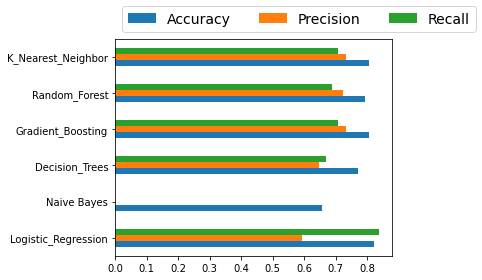

In [1092]:
ax = df_model.plot.barh()
ax.legend(
    ncol=len(classifier_models.keys()), 
    bbox_to_anchor=(0, 1), 
    loc='lower left', 
    prop={'size': 14}
)
plt.tight_layout()

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.

/

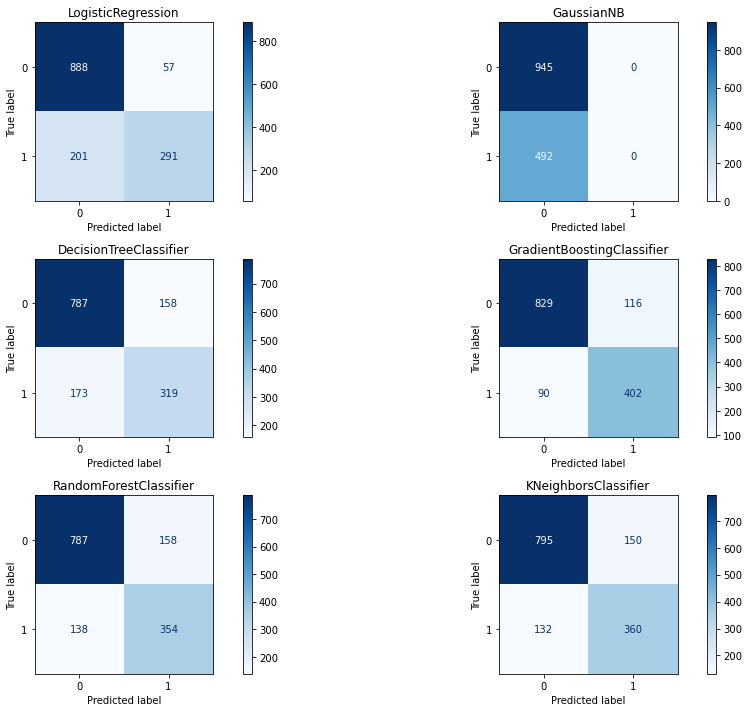

In [1093]:
from sklearn.metrics import plot_confusion_matrix

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15,10))

#temp_list = ["Poor", "Average", "Good", "Very Good", "Excellent"]

classifiers = [LogisticRegression(),
               GaussianNB(),
               DecisionTreeClassifier(),
               GradientBoostingClassifier(),
               RandomForestClassifier(),
               KNeighborsClassifier()
              ]


for cls, ax in zip(classifiers, axes.flatten()):
    cls.fit(X_train, y_train)
    predictions = cls.predict(X_test)
    plot_confusion_matrix(cls, 
                          X_test, 
                          y_test, 
                          ax=ax, 
                          cmap='Blues',
                         display_labels=cls.classes_)
    ax.title.set_text(type(cls).__name__)
    
plt.tight_layout()  
plt.show()